<h1> <center> Exploiting Sentinel-1 imagery time series to detect grasslands in northern Brazil tropical plains</center> </h1>
<h3> <center> Part 2 - Exploratory Data Analysis </center> </h3>
<center> Arian Ferreira Carneiro </center>
<center>Willian Vieira de Oliveira </center>

## Import required packages

In [1]:
#import numpy as np
import pandas as pd
#from osgeo import gdal, gdal_array
#from osgeo import osr
#from numpy import genfromtxt

# Load scikit's random forest classifier library
#from sklearn.ensemble import RandomForestClassifier
#from sklearn.model_selection import train_test_split
#from sklearn.metrics import accuracy_score

#import matplotlib.pyplot as plt
#import time

## Input parameters

In [100]:
# Would you like to write the results to file? ['YES', 'NO']
#write_files = 'YES'

In [102]:
# Classes
classes_names = ['Agriculture', 'Forest', 'Pasture']
classes_indexes = [ 1, 2, 3]

# Directories for the input files
dir_NL_samples = "OUTPUT/NL_AllSamples_pValues.csv"

dir_Ratio_samples = "OUTPUT/Ratio_AllSamples_pValues.csv"

dir_RGI_samples = "OUTPUT/RGI_AllSamples_pValues.csv"

dir_VH_samples = "OUTPUT/VH_AllSamples_pValues.csv"

dir_VV_samples = "OUTPUT/VV_AllSamples_pValues.csv"

# Lists of the directories
filenames = ['NL', 'Ratio', 'RGI', 'VH', 'VV']
list_samples = [dir_NL_samples, dir_Ratio_samples, dir_RGI_samples, dir_VH_samples, dir_VV_samples]

dir_output_pixels = "OUTPUT/EDA/"

## Auxiliary functions

### Function to write each classification map to file

## Analysis 1: Temporal behavior of the sample data

https://www.dataquest.io/blog/tutorial-time-series-analysis-with-pandas/

https://jakevdp.github.io/PythonDataScienceHandbook/04.06-customizing-legends.html



### Class: Agriculture

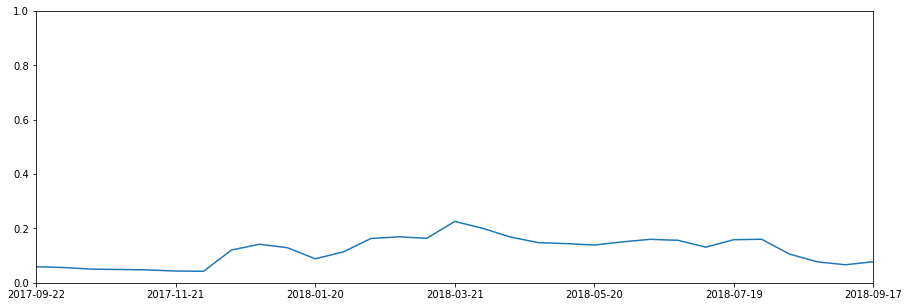

In [95]:
# Agriculture samples
data = sample_values[sample_values['Class'] == 1]
data = data.drop(labels='Class', axis=1) # removing the column 'Class' from the dataframe
data.mean().plot(linewidth=1.5, figsize=(15,5), ylim=(0,1))

### Class: Forest

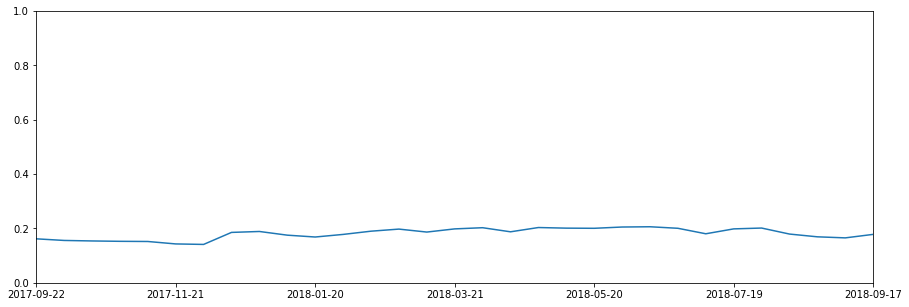

In [96]:
# Forest samples
data = sample_values[sample_values['Class'] == 2]
data = data.drop(labels='Class', axis=1) # removing the column 'Class' from the dataframe
data.mean().plot(linewidth=1.5, figsize=(15,5), ylim=(0,1))

### Class: Pasture

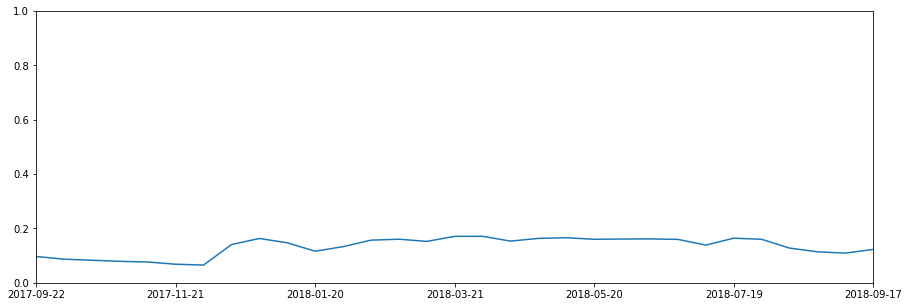

In [97]:
# Pasture samples
data = sample_values[sample_values['Class'] == 3]
data = data.drop(labels='Class', axis=1) # removing the column 'Class' from the dataframe
data.mean().plot(linewidth=1.5, figsize=(15,5), ylim=(0,1))

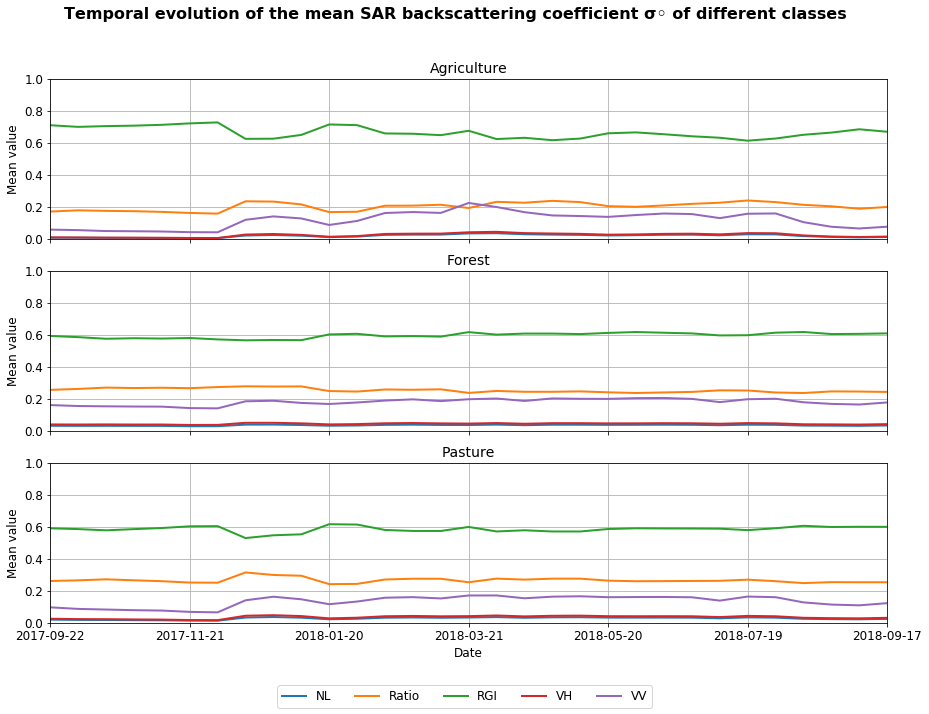

In [150]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10), sharex=True)

fig.suptitle('Temporal evolution of the mean SAR backscattering coefficient σ◦ of different classes', 
            fontsize=16, weight='bold')

for name, class_id, ax in zip(classes_names, classes_indexes, axes):
    
    #for i in range(1):
    for i in range(len(filenames)):
        #print("   ", filenames[i], " data...")

        sample_values = pd.read_csv(list_samples[i])

        # Filtering
        data = sample_values[sample_values['Class'] == class_id]
        data = data.drop(labels='Class', axis=1) # removing the column 'Class' from the dataframe

        # Plotting
        ax = data.mean().plot(ax=ax, linewidth=2.0, grid=True, ylim=(0,1), label=filenames[i], fontsize=12)
        ax.set_ylabel('Mean value', fontsize=12)
        ax.set_xlabel('Date', fontsize=12)
        ax.set_title(name, fontsize=14)
        
        # Remove the automatic x-axis label from all but the bottom subplot
        if ax != axes[-1]:
            ax.set_xlabel('')
    
handles, labels = plt.gca().get_legend_handles_labels()
by_label = OrderedDict(zip(labels, handles))
fig.legend(by_label.values(), by_label.keys(), loc='lower center', ncol=len(filenames), fontsize=12)

In [ ]:
cols_plot = ['Consumption', 'Solar', 'Wind']
axes = opsd_daily[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals (GWh)')

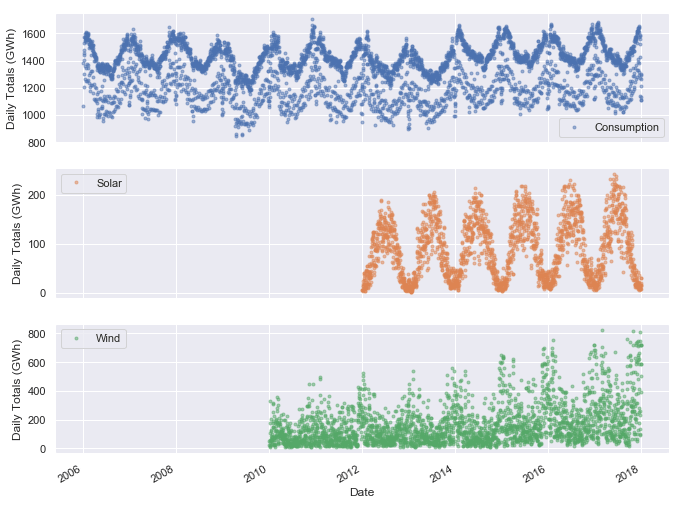